In [3]:
#import the libraries 
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use("fivethirtyeight")


In [23]:
#loading the data 
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()



In [5]:
#look at the data types of the variable 
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
print('x_train.shape',x_train.shape)
print('y_train.shape',y_train.shape)
print('x_test.shape',x_test.shape)
print('y_test.shape',y_test.shape)


x_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 1)
x_test.shape (10000, 32, 32, 3)
y_test.shape (10000, 1)


In [7]:
#take a look at the first image 
index=10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

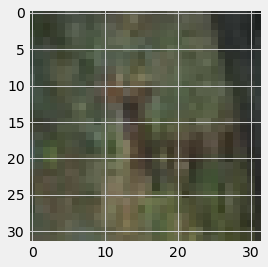

In [8]:
#showing image as picture 
img=plt.imshow(x_train[10])

In [9]:
#getting the image label 
print('The image label is ',y_train[index])

The image label is  [4]


In [10]:
#get the image classification 
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print("the image class is :",classification[y_train[index][0]])

the image class is : deer


In [11]:
#converting the numbers into a set of 10 numbers to input into the neural network
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [12]:
#print the labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [13]:
#print the new label of the image/picture above 
print ("the one hot label is ",y_train_one_hot[index])

the one hot label is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [14]:
#Normalize the pixels to be values between 0 and 1
x_train=x_train/255
x_test=x_test/255


In [15]:
x_train[index]



array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [18]:
#creat the models architecture
model=Sequential()
#add the first layer 
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))

# adding a poolong layer 
model.add(MaxPooling2D(pool_size=(2,2)))

#add another convulation layer
model.add(Conv2D(32,(5,5),activation='relu'))

# adding another pooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))

#adding flatten layer 
model.add(Flatten())

#add a layer with 1000 neurons 
model.add(Dense(1000,activation='relu'))

# add a drop out layer 
model.add(Dropout(0.5))

#add a layer with 250 neurons 
model.add(Dense(1000,activation='relu'))

#add a layer with 10 neurons 
model.add(Dense(10,activation='softmax'))

In [19]:
#compile the model 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=["accuracy"])

In [22]:
#train the model 
hist=model.fit(x_train,y_train_one_hot,batch_size=256,epochs=10,validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 60s 382ms/step - loss: 1.3915 - accuracy: 0.4953 - val_loss: 1.2550 - val_accuracy: 0.5568
Epoch 2/10
157/157 [==============================] - 60s 385ms/step - loss: 1.2287 - accuracy: 0.5599 - val_loss: 1.2671 - val_accuracy: 0.5596
Epoch 3/10
157/157 [==============================] - 61s 386ms/step - loss: 1.1304 - accuracy: 0.5980 - val_loss: 1.1572 - val_accuracy: 0.5937
Epoch 4/10
157/157 [==============================] - 61s 386ms/step - loss: 1.0530 - accuracy: 0.6245 - val_loss: 1.0423 - val_accuracy: 0.6359
Epoch 5/10
157/157 [==============================] - 60s 385ms/step - loss: 0.9771 - accuracy: 0.6553 - val_loss: 1.0286 - val_accuracy: 0.6373
Epoch 6/10
157/157 [==============================] - 60s 384ms/step - loss: 0.9177 - accuracy: 0.6713 - val_loss: 0.9877 - val_accuracy: 0.6530
Epoch 7/10
157/157 [==============================] - 61s 386ms/step - loss: 0.8570 - accuracy: 0.6966 - val_loss: 0.9933 - val_ac

In [24]:
#evaluate the model using test data set 
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 6s 18ms/step - loss: 238.7671 - accuracy: 0.4692


0.4691999852657318

In [30]:
from google.colab import files
uploaded =files.upload()

Saving download.jpg to download.jpg


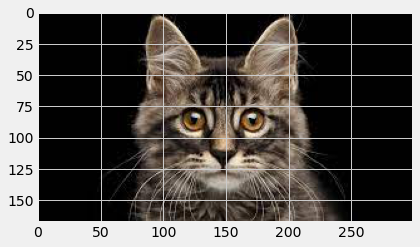

In [31]:
new_image=plt.imread('download.jpg')
img=plt.imshow(new_image)

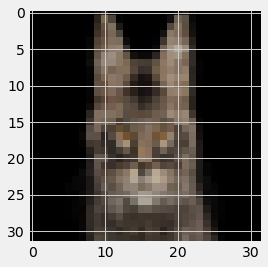

In [33]:
 #resize the image 
 from skimage.transform import resize
 resized_image=resize(new_image,(32,32,3))
 img=plt.imshow(resized_image)


In [35]:
#get the models predictions 
predictions =model.predict(np.array([resized_image]))
#show the predictions 
predictions

array([[6.0203520e-04, 1.6378488e-05, 6.7332789e-02, 7.3812544e-01,
        3.9434135e-02, 9.1675267e-02, 1.6281877e-02, 4.0937416e-02,
        5.4825232e-03, 1.1221222e-04]], dtype=float32)

In [36]:
#sort the predictions from least to greates 
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]]>x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp

#show the predictions
print(list_index)

[3, 5, 2, 7, 4, 6, 8, 0, 9, 1]


In [38]:
#print the first 5 prediction 
for i in range(5):
  print(classification[list_index[i]], ":" , round(predictions[0][list_index[i]] *100,2),"%")

cat : 73.81 %
dog : 9.17 %
bird : 6.73 %
horse : 4.09 %
deer : 3.94 %
